### 1. Problem statement
 - We are given Google stock price from 01/2012 to 12/2016. 
 - The task is to predict the trend of the stock price for 01/2017. 

### 2. Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


### 3. Data processing

import the data

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

#### 3.1 Feature scaling

In [3]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

#### 3.2 Data structure creation

In [4]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [6]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

#### 3.3 Data reshaping

In [7]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

### 4. Create & Fit Model

#### 4.1 Create model

In [8]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### 4.2 Model fit

In [10]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0477
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 6s 5ms

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 90/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 91/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0017
Epoch 92/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 93/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 94/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss:

#### 4.3 Model evaluation

#### 4.3.1 Read and convert

In [11]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values

#### 4.3.2 Concat and convert

In [12]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

#### 4.3.3 Reshape and scale

In [13]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

#### 4.3.4 Create test data strucutre

In [14]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#### 4.3.5 Model prediction

In [15]:
predicted_stock_price = regressor.predict(X_test)

In [16]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### 4.3.6 Result visualization

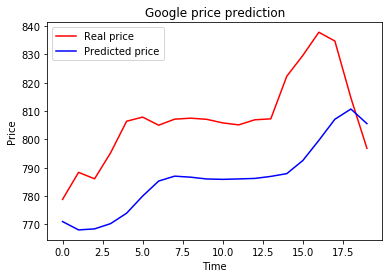

In [17]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()